## GeoPandas

In [13]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [14]:
# Read and Process GeoJSON data

gdf = gpd.read_file('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/GeoData/gadm41_PHL_2.json')
gdf.head(1)

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,PHL.1.1_1,PHL,Philippines,PHL.1_1,Abra,NA,Bangued,NA,NA,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"MULTIPOLYGON (((120.6113 17.4956, 120.6055 17...."


In [15]:
# Isolate Quezon Province Only

gdf_quezon = gdf.query("NAME_1 == 'Quezon'")

In [16]:
# Clean Data

gdf_quezon = gdf_quezon.drop(index = [1309])
gdf_quezon.head(1)

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
1296,PHL.62.1_1,PHL,Philippines,PHL.62_1,Quezon,NA,Agdangan,NA,NA,Bayan|Munisipyo,Municipality,45601,PH.QZ.AD,"MULTIPOLYGON (((121.9178 13.8541, 121.9051 13...."


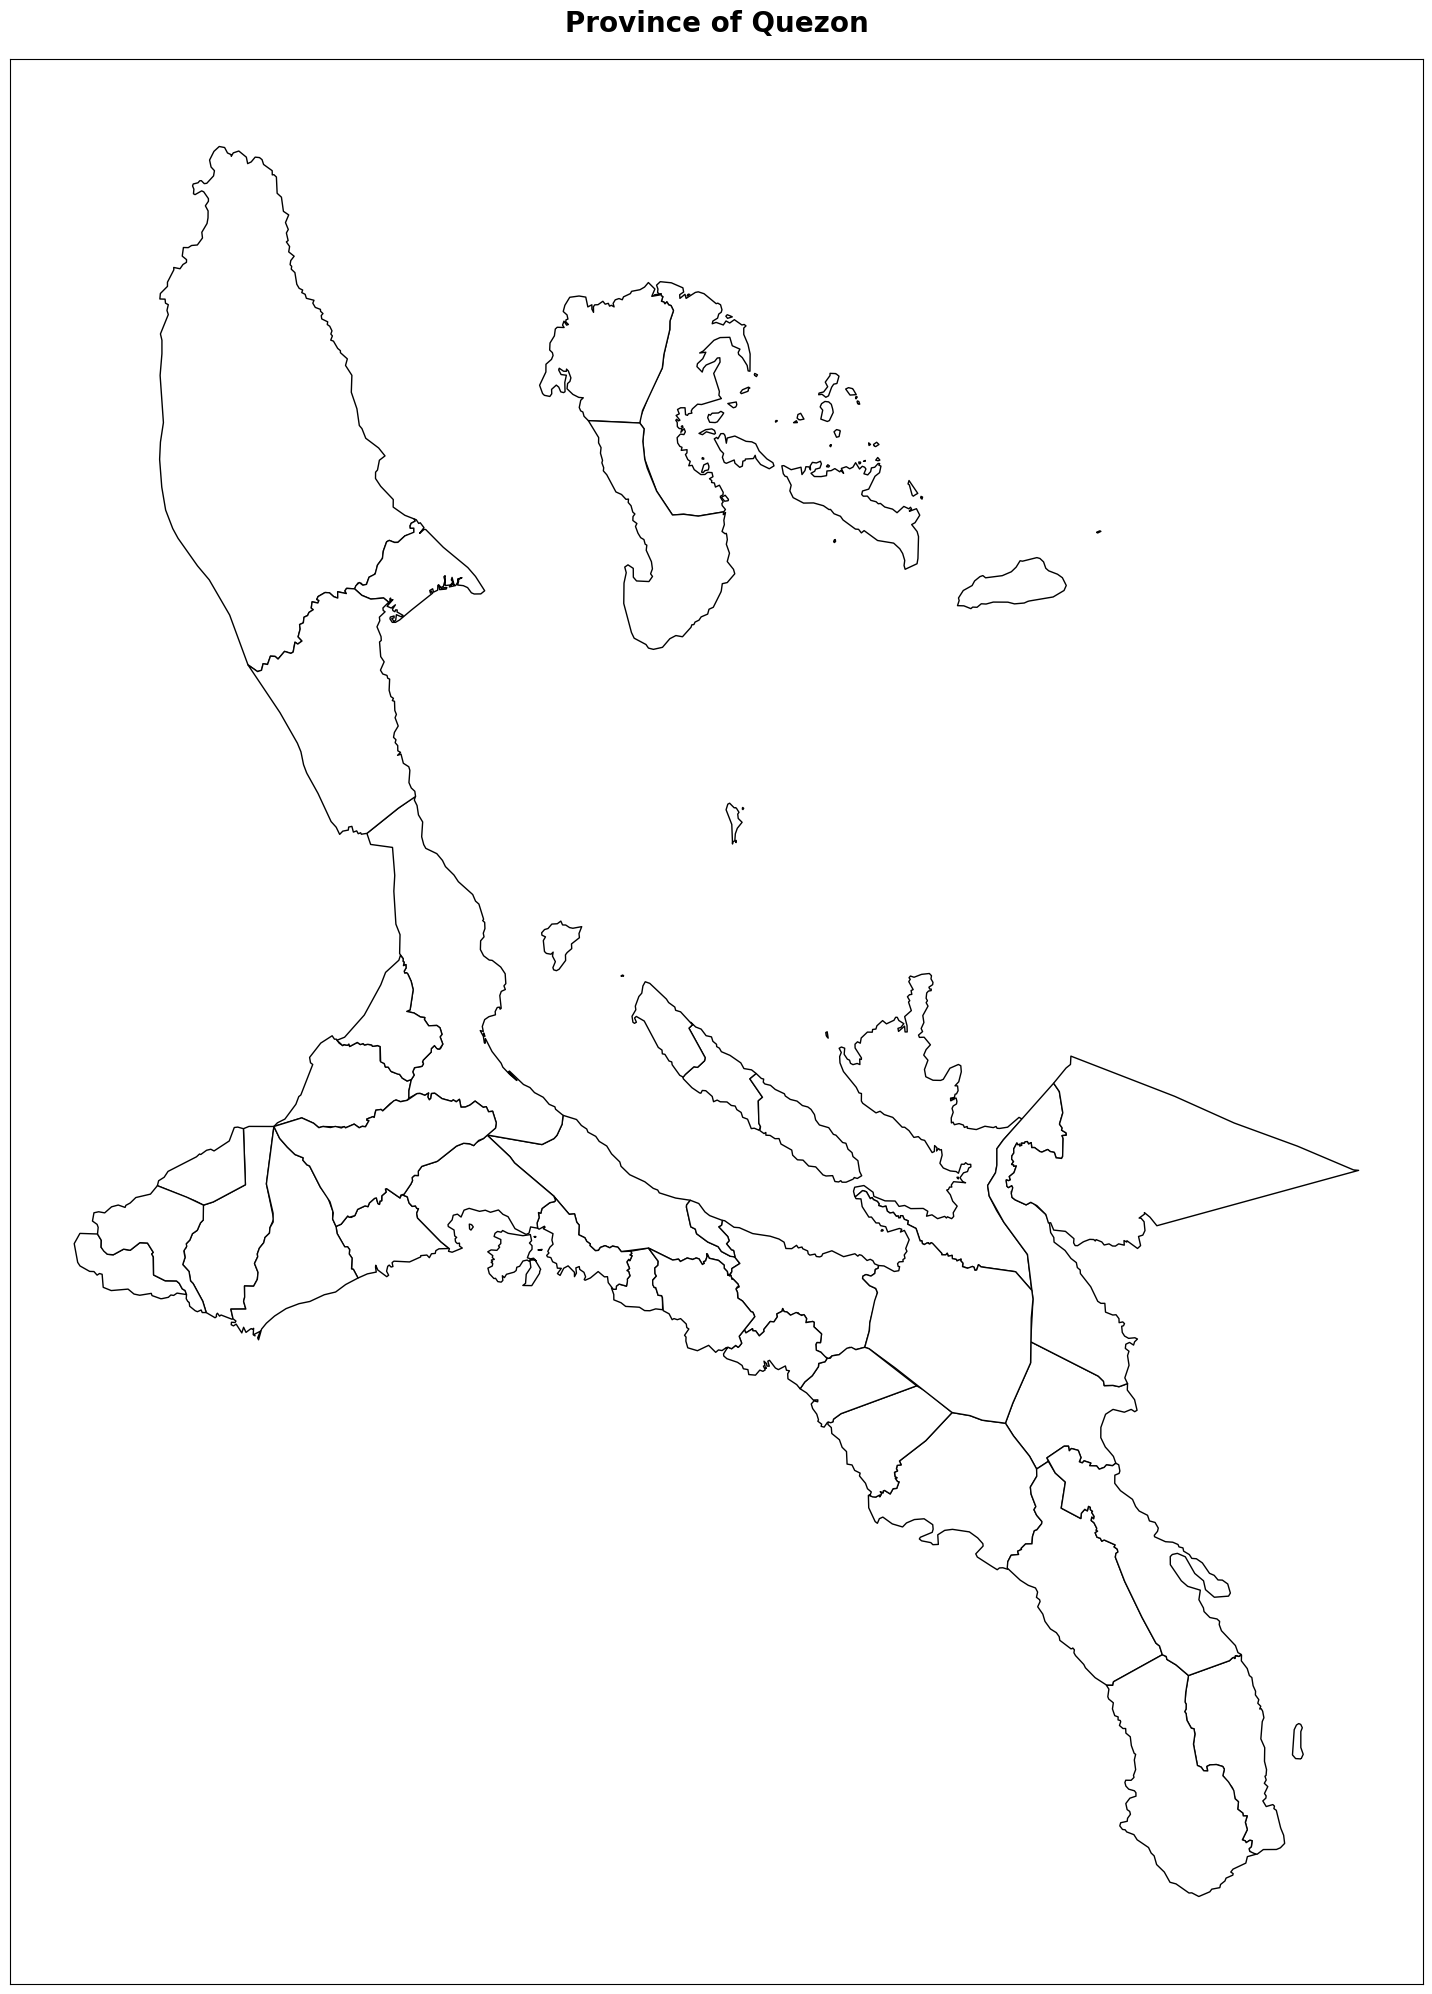

In [17]:
# Basic Plotting

# Create a plot with a custom figure size of 10 inches wide by 8 inches tall
fig, ax = plt.subplots(figsize=(25, 25))

gdf_quezon.plot(ax = ax, color = 'white', edgecolor = 'black')

# Add a title
ax.set_title("Province of Quezon", pad = 20, fontweight = 'bold', fontsize = 20)

# Remove Ticks
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [18]:
# Add Information from External Data Source

data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/GeoData/quezon_province.csv')
data[data['LGU'] == 'Lucban']

,NAME_1,NAME_2,LGU,Poverty_Incidence,Population_Growth,Category,Score,Population,Population Weight (50%),Revenue,Revenue Weight (50%),Total Percentage,Provincial Score,Mayor,District,Economic Dynamism,Government Efficiency,Infrastructure,Resiliency,Innovation
16,Quezon,Lucban,Lucban,4.0,0.65,Second Class Municipality,35.2748,51475.0,0.013,292098456.0,0.013,0.026,0.9101,Agustin Villaverde,District 1,3.8795,9.5094,2.9997,11.5821,7.2562


In [19]:
# Merge 'data' to 'gdf'  via NAME_2, Rember merge in Pandas?

final_data = pd.merge(gdf_quezon, data, on = 'NAME_2', how = 'inner')
final_data = final_data.drop(['GID_2', 'GID_0',
                              'COUNTRY', 'GID_1',
                              'NAME_1_x', 'NL_NAME_1',
                              'VARNAME_2', 'NL_NAME_2',
                              'TYPE_2', 'ENGTYPE_2', 'CC_2',
                              'HASC_2', 'NAME_1_y'], axis = 1)

final_data.head(1)

,NAME_2,geometry,LGU,Poverty_Incidence,Population_Growth,Category,Score,Population,Population Weight (50%),Revenue,Revenue Weight (50%),Total Percentage,Provincial Score,Mayor,District,Economic Dynamism,Government Efficiency,Infrastructure,Resiliency,Innovation
0,Agdangan,"MULTIPOLYGON (((121.9178 13.8541, 121.9051 13....",Agdangan,14.0,-0.14,Fifth Class Municipality,33.3311,12764.0,0.003,101754484.8,0.004,0.008,0.2533,Rhadam Aguilar,District 3,4.6446,7.3486,4.3798,11.4137,5.5426


In [20]:
# Load Another Data

df_points = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/GeoData/quezon_specific.csv')
df_points

,NAME_1,Area,latitude,longitude
0,Quezon,Patio Rizal,14.114325,121.554904


In [21]:
# Create geometric points

specific_points = {
    'Area': ['Kamay ni Jesus', 'Port of Real', 'Provincial Capitol', 'Cagbalete Island', 'Calilayan Island', 'Nabangka Elementary School'],
    'latitude': [14.10128, 14.670841, 13.92839, 14.28795, 13.94656, 13.83793,],
    'longitude': [121.57285, 121.613704, 121.61385, 121.83048, 121.71886, 122.47872]
}

df_points = pd.DataFrame(specific_points)
df_points = gpd.GeoDataFrame(df_points, geometry = gpd.points_from_xy(df_points['longitude'], df_points['latitude']))
df_points

,Area,latitude,longitude,geometry
0,Kamay ni Jesus,14.101280,121.572850,POINT (121.57285 14.10128)
1,Port of Real,14.670841,121.613704,POINT (121.6137 14.67084)
2,Provincial Capitol,13.928390,121.613850,POINT (121.61385 13.92839)
3,Cagbalete Island,14.287950,121.830480,POINT (121.83048 14.28795)
4,Calilayan Island,13.946560,121.718860,POINT (121.71886 13.94656)
5,Nabangka Elementary School,13.837930,122.478720,POINT (122.47872 13.83793)


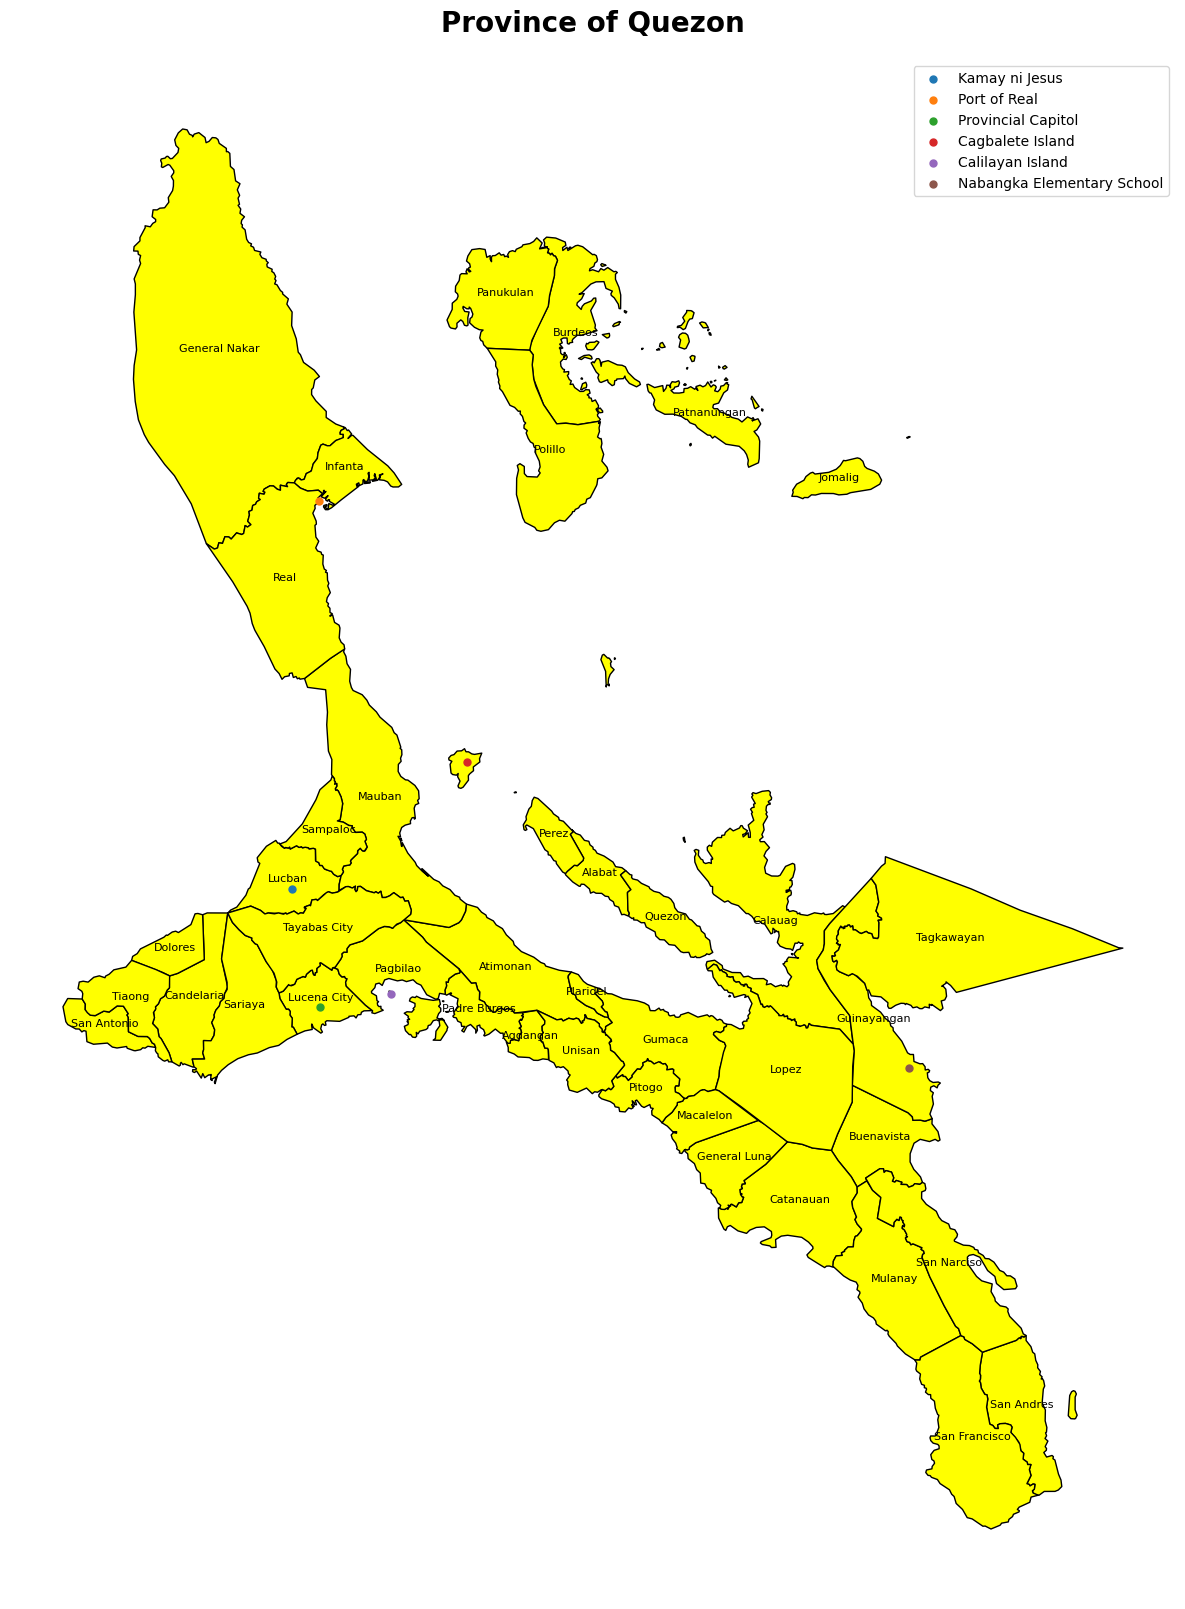

In [22]:
# Plotting Specifics Points

# Gumawa ng Plot
fig, ax = plt.subplots(figsize=(20, 20))

# Projection ng Mapa
gdf_quezon.plot(ax = ax, color = 'yellow', edgecolor = 'black')

# Projection ng Points
for area in df_points['Area'].unique():

  df_points[df_points['Area'] == area].plot(ax = ax, marker = 'o', markersize = 25, label = area, alpha = 1)

# Title ng Mapa
ax.set_title("Province of Quezon", pad = 20, fontweight = 'bold', fontsize = 20)

# Ilagay ang mga pangalan ng Municipalities
for idx, row in final_data.iterrows():

    ax.annotate(text=row['LGU'],
                xy=row['geometry'].centroid.coords[0],
                ha='center', fontsize=8, color='black')

# Ilagay ang mga pangalan ng mga specific points
# for idx, row in df_points.iterrows():

    # ax.annotate(text=row['Area'],
                # xy=(row['geometry'].x, row['geometry'].y),
                # xytext = (row['geometry'].x + 0.135, row['geometry'].y + 0.135),
                # arrowprops = dict(facecolor = 'black', shrink = 0.10, width = 0.5),
                #ha='center', fontsize=6, color='blue')

# Tanggalin ang ticks sa x and y axis
ax.set_xticks([])
ax.set_yticks([])

# Tanngalin ang border
ax.set_axis_off()

ax.legend()

# Ipakita ang mapa na walang additional kernel details
plt.show()